## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2,16,32,128,256]
MOMENTUM = 0.95

In [7]:
results = {}
for batch in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-BATCH-%s" % str(batch)
    results[exp_name_tag] = {"train-loss":train_loss,
                             "valid-loss":valid_loss,
                             "train-acc":train_acc,
                             "valid-acc":valid_acc}





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
______

50000/50000 [==============================] - 194s 4ms/step - loss: 2.2336 - acc: 0.1580 - val_loss: 3.0994 - val_acc: 0.1630
Epoch 39/50
50000/50000 [==============================] - 202s 4ms/step - loss: 2.2322 - acc: 0.1571 - val_loss: 3.3577 - val_acc: 0.1891
Epoch 40/50
50000/50000 [==============================] - 195s 4ms/step - loss: 2.2334 - acc: 0.1604 - val_loss: 3.3109 - val_acc: 0.1887
Epoch 41/50
50000/50000 [==============================] - 204s 4ms/step - loss: 2.2400 - acc: 0.1587 - val_loss: 3.4891 - val_acc: 0.1706
Epoch 42/50
50000/50000 [==============================] - 198s 4ms/step - loss: 2.2441 - acc: 0.1581 - val_loss: 3.3114 - val_acc: 0.1743
Epoch 43/50
50000/50000 [==============================] - 200s 4ms/step - loss: 2.2403 - acc: 0.1629 - val_loss: 3.1666 - val_acc: 0.2101
Epoch 44/50
50000/50000 [==============================] - 198s 4ms/step - loss: 2.2332 - acc: 0.1624 - val_loss: 2.9661 - val_acc: 0.1961
Epoch 45/50
50000/50000 [==============

50000/50000 [==============================] - 26s 516us/step - loss: 1.1722 - acc: 0.5839 - val_loss: 1.3322 - val_acc: 0.5283
Epoch 37/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.1799 - acc: 0.5809 - val_loss: 1.3515 - val_acc: 0.5237
Epoch 38/50
50000/50000 [==============================] - 26s 519us/step - loss: 1.1651 - acc: 0.5876 - val_loss: 1.3956 - val_acc: 0.5170
Epoch 39/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.1603 - acc: 0.5870 - val_loss: 1.4051 - val_acc: 0.5140
Epoch 40/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.1546 - acc: 0.5913 - val_loss: 1.3650 - val_acc: 0.5277
Epoch 41/50
50000/50000 [==============================] - 26s 515us/step - loss: 1.1538 - acc: 0.5887 - val_loss: 1.3407 - val_acc: 0.5267
Epoch 42/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.1499 - acc: 0.5918 - val_loss: 1.3489 - val_acc: 0.5286
Epoch 43/50
50000/50000 [=======

50000/50000 [==============================] - 13s 266us/step - loss: 0.9349 - acc: 0.6657 - val_loss: 1.4664 - val_acc: 0.5142
Epoch 35/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.9303 - acc: 0.6670 - val_loss: 1.4793 - val_acc: 0.5131
Epoch 36/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.9080 - acc: 0.6757 - val_loss: 1.5718 - val_acc: 0.4902
Epoch 37/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.8951 - acc: 0.6802 - val_loss: 1.5188 - val_acc: 0.5087
Epoch 38/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.8897 - acc: 0.6830 - val_loss: 1.5392 - val_acc: 0.5038
Epoch 39/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.8735 - acc: 0.6874 - val_loss: 1.4628 - val_acc: 0.5217
Epoch 40/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.8687 - acc: 0.6871 - val_loss: 1.4401 - val_acc: 0.5331
Epoch 41/50
50000/50000 [=======

Epoch 33/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.4905 - acc: 0.8291 - val_loss: 2.1907 - val_acc: 0.4433
Epoch 34/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.4814 - acc: 0.8332 - val_loss: 2.2119 - val_acc: 0.4502
Epoch 35/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.4702 - acc: 0.8361 - val_loss: 2.2211 - val_acc: 0.4501
Epoch 36/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.4576 - acc: 0.8401 - val_loss: 2.1034 - val_acc: 0.4502
Epoch 37/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.4449 - acc: 0.8450 - val_loss: 2.0507 - val_acc: 0.4809
Epoch 38/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.4239 - acc: 0.8523 - val_loss: 2.2032 - val_acc: 0.4508
Epoch 39/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.3969 - acc: 0.8644 - val_loss: 2.2031 - val_acc: 0.4601
Epoch 40/50
50000/50000 [=========

Epoch 32/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.4590 - acc: 0.8498 - val_loss: 1.9150 - val_acc: 0.4620
Epoch 33/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.4353 - acc: 0.8599 - val_loss: 2.0142 - val_acc: 0.4598
Epoch 34/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.4201 - acc: 0.8663 - val_loss: 2.0315 - val_acc: 0.4618
Epoch 35/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3995 - acc: 0.8729 - val_loss: 1.9968 - val_acc: 0.4752
Epoch 36/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.3814 - acc: 0.8799 - val_loss: 2.1199 - val_acc: 0.4456
Epoch 37/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.3621 - acc: 0.8866 - val_loss: 2.0261 - val_acc: 0.4744
Epoch 38/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.3408 - acc: 0.8946 - val_loss: 2.1286 - val_acc: 0.4748
Epoch 39/50
50000/50000 [=========

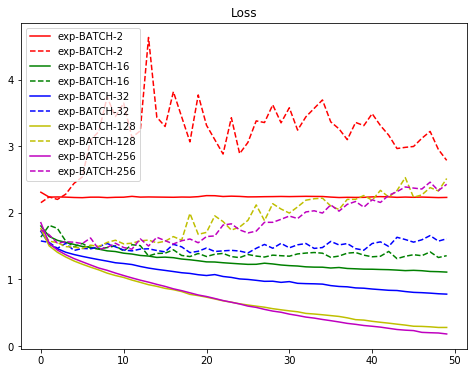

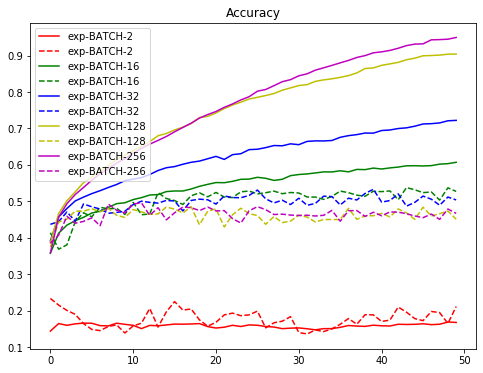

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# BN before Activation

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
results = {}
for batch in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-BATCH-%s" % str(batch)
    results[exp_name_tag] = {"train-loss":train_loss,
                             "valid-loss":valid_loss,
                             "train-acc":train_acc,
                             "valid-acc":valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 188s 4ms/step - loss: 2.2008 - acc: 0.1909 - val_loss: 3.9608 - val_acc: 0.2116
Epoch 50/50
50000/50000 [==============================] - 188s 4ms/step - loss: 2.2036 - acc: 0.1894 - val_loss: 3.9709 - val_acc: 0.2072
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________

50000/50000 [==============================] - 23s 468us/step - loss: 0.5713 - acc: 0.7973 - val_loss: 1.5400 - val_acc: 0.5566
Epoch 48/50
50000/50000 [==============================] - 23s 468us/step - loss: 0.5692 - acc: 0.7976 - val_loss: 1.5718 - val_acc: 0.5449
Epoch 49/50
50000/50000 [==============================] - 23s 469us/step - loss: 0.5580 - acc: 0.8013 - val_loss: 1.5697 - val_acc: 0.5496
Epoch 50/50
50000/50000 [==============================] - 23s 468us/step - loss: 0.5606 - acc: 0.8005 - val_loss: 1.5911 - val_acc: 0.5473
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1

50000/50000 [==============================] - 13s 253us/step - loss: 0.3059 - acc: 0.8922 - val_loss: 2.0605 - val_acc: 0.5351
Epoch 46/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.2956 - acc: 0.8957 - val_loss: 2.0641 - val_acc: 0.5293
Epoch 47/50
50000/50000 [==============================] - 13s 255us/step - loss: 0.2885 - acc: 0.8994 - val_loss: 2.0768 - val_acc: 0.5368
Epoch 48/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.2768 - acc: 0.9021 - val_loss: 2.1074 - val_acc: 0.5334
Epoch 49/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.2666 - acc: 0.9061 - val_loss: 2.1287 - val_acc: 0.5359
Epoch 50/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.2633 - acc: 0.9067 - val_loss: 2.0852 - val_acc: 0.5404
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072

Epoch 44/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.0761 - acc: 0.9782 - val_loss: 2.5921 - val_acc: 0.5131
Epoch 45/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.0738 - acc: 0.9787 - val_loss: 2.5797 - val_acc: 0.5187
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.0701 - acc: 0.9791 - val_loss: 2.6330 - val_acc: 0.5173
Epoch 47/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.0735 - acc: 0.9779 - val_loss: 2.5950 - val_acc: 0.5178
Epoch 48/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.0679 - acc: 0.9803 - val_loss: 2.6465 - val_acc: 0.5245
Epoch 49/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.0637 - acc: 0.9820 - val_loss: 2.6602 - val_acc: 0.5209
Epoch 50/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.0576 - acc: 0.9845 - val_loss: 2.6757 - val_acc: 0.5182
__________________________________

50000/50000 [==============================] - 3s 64us/step - loss: 0.0633 - acc: 0.9897 - val_loss: 2.3805 - val_acc: 0.5080
Epoch 43/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0593 - acc: 0.9903 - val_loss: 2.4286 - val_acc: 0.4992
Epoch 44/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.0517 - acc: 0.9924 - val_loss: 2.4487 - val_acc: 0.5079
Epoch 45/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0498 - acc: 0.9929 - val_loss: 2.4562 - val_acc: 0.5059
Epoch 46/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0455 - acc: 0.9938 - val_loss: 2.4902 - val_acc: 0.5065
Epoch 47/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.0410 - acc: 0.9944 - val_loss: 2.5179 - val_acc: 0.5082
Epoch 48/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0384 - acc: 0.9949 - val_loss: 2.5273 - val_acc: 0.5058
Epoch 49/50
50000/50000 [=====================

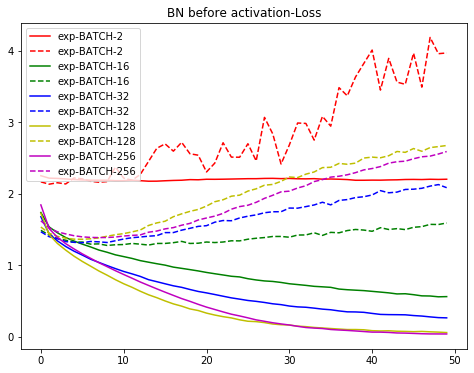

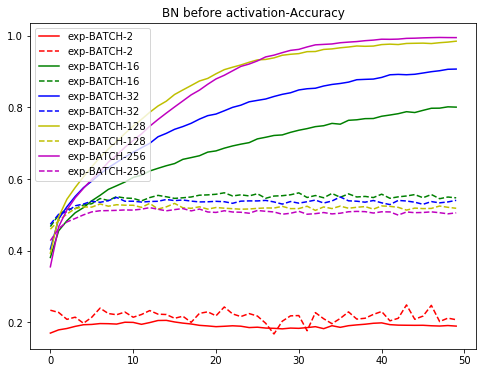

In [11]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("BN before activation-Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("BN before activation-Accuracy")
plt.legend()
plt.show()

# BN after inputlayer

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
results = {}
for batch in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-BATCH-%s" % str(batch)
    results[exp_name_tag] = {"train-loss":train_loss,
                             "valid-loss":valid_loss,
                             "train-acc":train_acc,
                             "valid-acc":valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.7085 - acc: 0.3898 - val_loss: 1.5148 - val_acc: 0.4662
Epoch 2/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.5077 - acc: 0.4645 - val_loss: 1.4463 - val_acc: 0.4904
Epoch 3/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.4095 - acc: 0.4987 - val_loss: 1.3906 - val_acc: 0.5105
Epoch 4/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.3412 - acc: 0.5236 - val_loss: 1.3736 - val_acc: 0.5144
Epoch 5/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.2870 - acc: 0.5407 - val_loss: 1.3372 - val_acc: 0.5320
Epoch 6/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.2320 - acc: 0.5610 - val_loss: 1.3369 - val_acc: 0.5286
Epoch 7/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.1865 - acc: 0.5790 - val_loss: 1.

50000/50000 [==============================] - 10s 207us/step - loss: 1.6827 - acc: 0.4034 - val_loss: 1.5335 - val_acc: 0.4482
Epoch 2/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4530 - acc: 0.4881 - val_loss: 1.4257 - val_acc: 0.5059
Epoch 3/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.3408 - acc: 0.5268 - val_loss: 1.3976 - val_acc: 0.5087
Epoch 4/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.2560 - acc: 0.5590 - val_loss: 1.3726 - val_acc: 0.5214
Epoch 5/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.1850 - acc: 0.5804 - val_loss: 1.3621 - val_acc: 0.5234
Epoch 6/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.1207 - acc: 0.6022 - val_loss: 1.3764 - val_acc: 0.5268
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.0589 - acc: 0.6270 - val_loss: 1.3654 - val_acc: 0.5287
Epoch 8/50
50000/50000 [====================

50000/50000 [==============================] - 5s 100us/step - loss: 1.7768 - acc: 0.3705 - val_loss: 1.5731 - val_acc: 0.4458
Epoch 2/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5004 - acc: 0.4755 - val_loss: 1.4775 - val_acc: 0.4749
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.3816 - acc: 0.5177 - val_loss: 1.4298 - val_acc: 0.5004
Epoch 4/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.2890 - acc: 0.5516 - val_loss: 1.3934 - val_acc: 0.5118
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.2087 - acc: 0.5809 - val_loss: 1.3657 - val_acc: 0.5211
Epoch 6/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1396 - acc: 0.6051 - val_loss: 1.3612 - val_acc: 0.5213
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.0722 - acc: 0.6307 - val_loss: 1.3558 - val_acc: 0.5317
Epoch 8/50
50000/50000 [===========================

Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6079 - acc: 0.4359 - val_loss: 1.5741 - val_acc: 0.4509
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5016 - acc: 0.4738 - val_loss: 1.5108 - val_acc: 0.4669
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4194 - acc: 0.5044 - val_loss: 1.4663 - val_acc: 0.4831
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3513 - acc: 0.5293 - val_loss: 1.4426 - val_acc: 0.4933
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.2914 - acc: 0.5542 - val_loss: 1.4116 - val_acc: 0.5029
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.2351 - acc: 0.5719 - val_loss: 1.4040 - val_acc: 0.5055
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.1824 - acc: 0.5914 - val_loss: 1.3855 - val_acc: 0.5123
Epoch 9/50
50000/50000 [=================

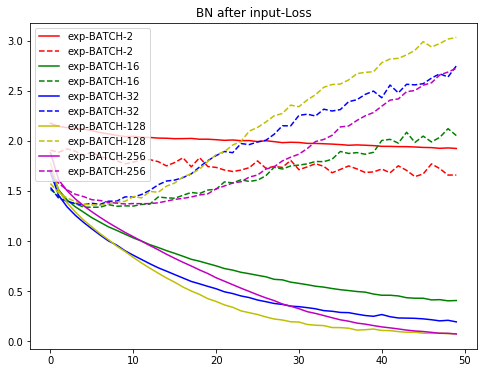

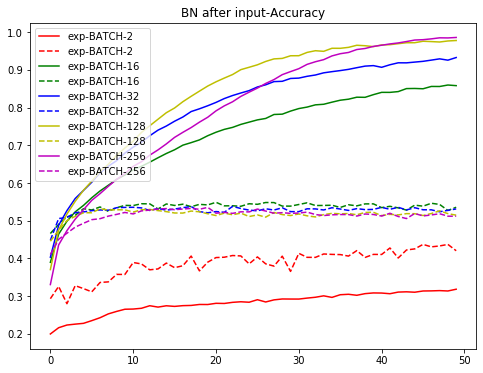

In [14]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("BN after input-Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("BN after input-Accuracy")
plt.legend()
plt.show()